<a href="https://colab.research.google.com/github/Tosraheal/Data-Science-Machine-Learning/blob/main/Practice_Applying_Simple_Regression_Problems_to_Solve_Challenges_Categorical_Features_By_Oluwatosin_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Creating the right virtual environment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Reading data from the URL

data = pd.read_csv('http://roycekimmons.com/system/generate_data.php?dataset=exams&n=1000')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,associate's degree,standard,none,29,45,42
1,male,group C,some college,free/reduced,none,50,47,44
2,female,group D,high school,free/reduced,completed,65,84,85
3,male,group D,associate's degree,standard,completed,76,84,81
4,female,group E,some college,standard,none,96,99,96


In [ ]:
data.shape

(1000, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
data.describe() #getting statistical information of the data

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.040000,69.843000,68.792000
std,15.463878,15.043625,15.578235
min,14.000000,23.000000,20.000000
25%,57.000000,59.000000,58.000000
50%,67.000000,70.000000,69.000000
75%,78.000000,80.000000,80.000000
max,100.000000,100.000000,100.000000


In [ ]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

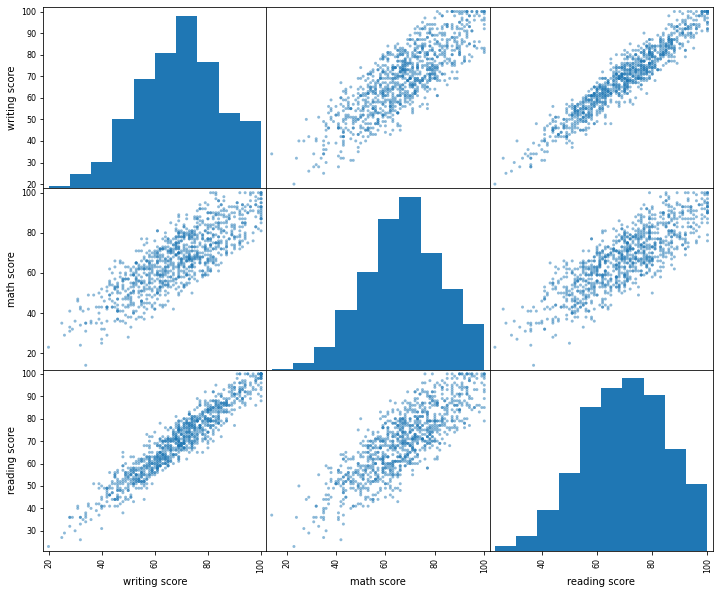

In [ ]:
from pandas.plotting import scatter_matrix

#fig, ax = plt.subplots(figsize=(12, 10)) # pre-determining this for a larger figure size than the default

features = ['writing score', 'math score', 'reading score']

scatter_matrix(data[features], figsize=(12, 10))

plt.show();

In [ ]:
##using sklearn to scale the numeriacl values
from sklearn import preprocessing

data[['math score']] = preprocessing.scale(data[['math score']].astype('float64'))
data[['reading score']] = preprocessing.scale(data[['reading score']].astype('float64'))
data[['writing score']] = preprocessing.scale(data[['writing score']].astype('float64'))

In [ ]:
## Viewing the head again

data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,associate's degree,standard,none,-2.461157,-1.652223,-1.720696
1,male,group C,some college,free/reduced,none,-1.102474,-1.519210,-1.592247
2,female,group D,high school,free/reduced,completed,-0.131986,0.941534,1.040947
3,male,group D,associate's degree,standard,completed,0.579705,0.941534,0.784050
4,female,group E,some college,standard,none,1.873688,1.939133,1.747413


In [ ]:
# Picking 5 rows of the data at random

data.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
748,female,group D,associate's degree,standard,completed,0.385607,1.274067,1.169395
226,female,group D,bachelor's degree,standard,completed,1.679591,1.606600,2.004310
652,female,group D,high school,standard,none,-1.231873,-1.186677,-0.950005
805,female,group C,high school,standard,completed,0.450306,1.074547,1.169395
240,female,group D,master's degree,free/reduced,none,-0.973076,0.143455,-0.050866


In [ ]:
data.describe() #getting statistical information of the data

,math score,reading score,writing score
count,1.000000e+03,1.000000e+03,1.000000e+03
mean,-3.918532e-16,-2.389200e-16,-5.986878e-17
std,1.000500e+00,1.000500e+00,1.000500e+00
min,-3.431645e+00,-3.115369e+00,-3.133629e+00
25%,-6.495799e-01,-7.211311e-01,-6.931080e-01
50%,-2.587968e-03,1.044154e-02,1.335864e-02
75%,7.091031e-01,6.755075e-01,7.198253e-01
max,2.132485e+00,2.005640e+00,2.004310e+00


In [ ]:
data.info() #checking for the type of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   float64
 6   reading score                1000 non-null   float64
 7   writing score                1000 non-null   float64
dtypes: float64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
#information on unique categories on parental level of education
data['parental level of education'].unique()

array(["associate's degree", 'some college', 'high school',
       "bachelor's degree", 'some high school', "master's degree"],
      dtype=object)

In [ ]:
# Pass these unique values as a list so you can encode each of these labels/categories

parent_level_of_education = ["some high school", "high school", "some college", "associate's degree", "bachelor's degree", "master's degree"]

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the object
label_encoding = preprocessing.LabelEncoder()

# Estimate the mapping by calling fit on the estimator and passing the list to be encoded
label_encoding = label_encoding.fit(parent_level_of_education)

In [ ]:
label_encoding.classes_

array(["associate's degree", "bachelor's degree", 'high school',
       "master's degree", 'some college', 'some high school'],
      dtype='<U18')

In [ ]:
data['parental level of education'] = label_encoding.transform(data['parental level of education'].astype(str))

data.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
534,female,group E,4,standard,none,0.450306,0.409481,0.784050
39,male,group C,4,standard,none,1.420794,0.409481,0.912498
646,female,group B,4,standard,none,-0.584881,0.143455,0.013359
92,female,group C,0,free/reduced,none,-0.196686,0.409481,0.013359
971,male,group D,3,standard,none,2.132485,1.540093,1.490516


In [ ]:
data['parental level of education'].unique()

array([0, 4, 2, 1, 5, 3])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   int64  
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   float64
 6   reading score                1000 non-null   float64
 7   writing score                1000 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 62.6+ KB


In [ ]:
# Using the get_dummies function on the data and passing into the specific column of interest

data = pd.get_dummies(data, columns=['race/ethnicity'])

data.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,female,0,standard,none,-2.461157,-1.652223,-1.720696,0,0,0,1,0
1,male,4,free/reduced,none,-1.102474,-1.519210,-1.592247,0,0,1,0,0
2,female,2,free/reduced,completed,-0.131986,0.941534,1.040947,0,0,0,1,0
3,male,0,standard,completed,0.579705,0.941534,0.784050,0,0,0,1,0
4,female,4,standard,none,1.873688,1.939133,1.747413,0,0,0,0,1


In [ ]:
data = pd.get_dummies(data, columns=['gender','lunch','test preparation course'])
data.head()

,parental level of education,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,gender_female,gender_male,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,0,-2.461157,-1.652223,-1.720696,0,0,0,1,0,1,0,0,1,0,1
1,4,-1.102474,-1.519210,-1.592247,0,0,1,0,0,0,1,1,0,0,1
2,2,-0.131986,0.941534,1.040947,0,0,0,1,0,1,0,1,0,1,0
3,0,0.579705,0.941534,0.784050,0,0,0,1,0,0,1,0,1,1,0
4,4,1.873688,1.939133,1.747413,0,0,0,0,1,1,0,0,1,0,1


In [ ]:
from sklearn.model_selection import train_test_split

# dropping the column (axis=1) we want to predict
X = data.drop('math score', axis=1)

# Assigning the reponse/target variable to the y variable here
y = data['math score']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [ ]:
## Checking the shape of each set

print('Shape of the training set is {}'.format(x_train.shape)) 

print('Shape of the training set label is {}'.format(y_train.shape))

Shape of the training set is (800, 14)
Shape of the training set label is (800,)


In [ ]:
print('Shape of the training set is {}'.format(x_test.shape))

print('Shape of the training set label is {}'.format(y_test.shape))

Shape of the training set is (200, 14)
Shape of the training set label is (200,)


In [ ]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(fit_intercept=False).fit(x_train, y_train)

In [ ]:
y_pred = linear_model.predict(x_test)

In [ ]:
## Scoring the model for its performance on the test data

# Importing the r^2 metric from the metrics package of sklearn

from sklearn.metrics import r2_score

model = 'Testing score: {}'.format((r2_score(y_test, y_pred)*100).round(2)) + "%"
print(model)

Testing score: 89.0%


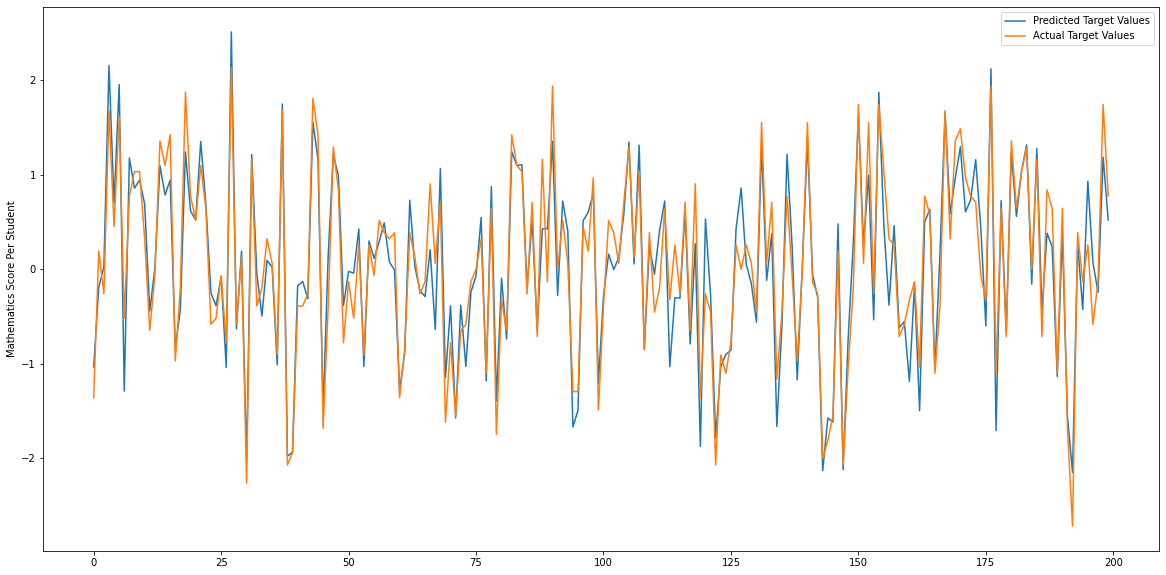

In [ ]:
plt.figure(figsize = (20,10))

plt.plot(y_pred, label='Predicted Target Values')
plt.plot(y_test.values, label='Actual Target Values')

plt.ylabel('Mathematics Score Per Student')

plt.legend()
plt.show()

In [ ]:
actual_pred_data = pd.DataFrame({'predicted': y_pred, 'actual': y_test})

actual_pred_data.head(10)

,predicted,actual
568,-1.035281,-1.361271
502,-0.191448,0.191510
477,0.022035,-0.261385
187,2.155290,1.679591
534,0.696651,0.450306
704,1.953435,1.614892
553,-1.291102,-0.520181
699,1.177473,0.773802
594,0.856585,1.032599
53,0.943022,1.032599


In [ ]:
# Assigning all the features to a predictor variable

predictors = x_train.columns

# Making a pandas series off the predictors and asign them to the model's coefficients, sort the values from lowest to highest value
coef = pd.Series(linear_model.coef_, predictors).sort_values()

print(coef)

gender_female                       -0.432935
lunch_free/reduced                  -0.113039
test preparation course_completed   -0.112060
race/ethnicity_group B              -0.092131
race/ethnicity_group C              -0.085706
race/ethnicity_group A              -0.078260
race/ethnicity_group D              -0.065577
parental level of education          0.000783
test preparation course_none         0.090348
lunch_standard                       0.091327
reading score                        0.261003
race/ethnicity_group E               0.299963
gender_male                          0.411222
writing score                        0.686107
dtype: float64


**RUNNING A COMPARISON**

In [ ]:
## Run all cell again to this point


## Drop the target column and the feaures you do not want to use for prediction
#X =
#y = 

# Perform train-test split

# Instantiate the model

# Fit the model

# Evalaute the trained model

# Make predictions on test set

# Score predictions

# Compare against model we built ealier to see if performance improves or reduces

# Compare actual vs predicted target variables for your model


**Running a comparison model and will be removing gender and writing score from the data set**

In [ ]:
#dropping writing score
data.drop('writing score', axis = 'columns', inplace = True)

In [ ]:
#dropping gender of the two categories
data.drop('gender_female', axis = 'columns', inplace = True)

In [ ]:
data.drop('gender_male', axis = 'columns', inplace = True)

In [ ]:
new_data = data
new_data.head() #printing the new data

,parental level of education,math score,reading score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,0,-2.461157,-1.652223,0,0,0,1,0,0,1,0,1
1,4,-1.102474,-1.519210,0,0,1,0,0,1,0,0,1
2,2,-0.131986,0.941534,0,0,0,1,0,1,0,1,0
3,0,0.579705,0.941534,0,0,0,1,0,0,1,1,0
4,4,1.873688,1.939133,0,0,0,0,1,0,1,0,1


In [ ]:
from sklearn.model_selection import train_test_split

# dropping the column (axis=1) we want to predict
X1 = new_data.drop('math score', axis = 1)

# Selecting the reponse/target variable to the y variable
y1 = new_data['math score']

x1_train, x1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2)

In [ ]:
## Checking the shape of each set

print('Shape of the training set is {}'.format(x1_train.shape)) 

print('Shape of the training set label is {}'.format(y1_train.shape))

Shape of the training set is (800, 11)
Shape of the training set label is (800,)


In [ ]:
print('Shape of the training set is {}'.format(x1_test.shape))

print('Shape of the training set label is {}'.format(y1_test.shape))

Shape of the training set is (200, 11)
Shape of the training set label is (200,)


In [ ]:
from sklearn.linear_model import LinearRegression #applying linear regression model

linear_model1 = LinearRegression(fit_intercept=False).fit(x1_train, y1_train)

In [ ]:
y1_pred = linear_model1.predict(x1_test)

In [ ]:
# Scoring the model for its performance on the test data

# Importing the r^2 metric from the metrics package of sklearn

from sklearn.metrics import r2_score

model1 = 'Testing score: {}'.format((r2_score(y1_test, y1_pred)*100).round(2)) + "%"
print (model1)

Testing score: 70.92%


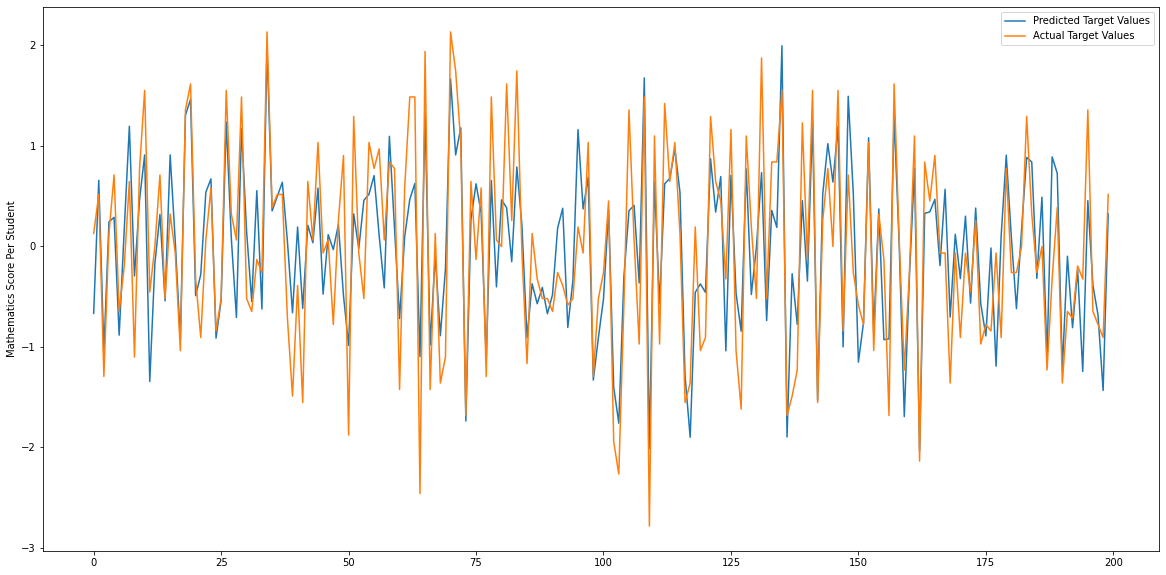

In [ ]:
plt.figure(figsize = (20,10)) #plotting the predicted y values against the remnant y test

plt.plot(y1_pred, label='Predicted Target Values')
plt.plot(y1_test.values, label='Actual Target Values')

plt.ylabel('Mathematics Score Per Student')

plt.legend()
plt.show()

In [ ]:
# Comparing against model built ealier to see if performance improves or reduces
Performance = [['first model', model, 'performed better due to the writing score'], ['second model', model1, 'score is lower, performance reduces']]
compare_results = pd.DataFrame(Performance, columns = ['Model_Name', 'Result', 'Comments'])
compare_results

,Model_Name,Result,Comments
0,first model,Testing score: 89.0%,performed better due to the writing score
1,second model,Testing score: 70.92%,"score is lower, performance reduces"


In [ ]:
actual_pred_data1 = pd.DataFrame({'predicted': y1_pred, 'actual': y1_test})

actual_pred_data1.head(10) #compare actual values to the newly predicted values

,predicted,actual
593,-0.667969,0.126810
210,0.656250,0.515006
778,-1.044922,-1.296572
527,0.243164,0.126810
686,0.287109,0.709103
804,-0.884766,-0.649580
307,0.169922,-0.196686
483,1.193359,0.644404
833,-0.295898,-1.102474
827,0.464844,0.773802


In [ ]:
# Assigning all the features to a predictor variable

predictors1 = x1_train.columns

# Making a pandas series off the predictors and asigning them to the model's coefficients, sort the values from lowest to highest value
coef1 = pd.Series(linear_model1.coef_, predictors1).sort_values()

print(coef1)

race/ethnicity_group A              -7.816578e+12
race/ethnicity_group C              -7.816578e+12
race/ethnicity_group B              -7.816578e+12
race/ethnicity_group D              -7.816578e+12
race/ethnicity_group E              -7.816578e+12
lunch_free/reduced                  -4.267125e+12
lunch_standard                      -4.267125e+12
parental level of education         -1.646165e-02
reading score                        7.597148e-01
test preparation course_none         1.208370e+13
test preparation course_completed    1.208370e+13
dtype: float64
